In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import wooldridge
from see import see
from py4etrics.truncreg import Truncreg
from py4etrics.tobit import Tobit
from py4etrics.heckit import Heckit
from py4etrics.hetero_test import het_test_probit

ModuleNotFoundError: No module named 'py4etrics'

In [2]:
# 標本の大きさ 
n = 100

# y*を決定するx
x = np.sort(norm.rvs(0,3,size=n))  # ランダム変数を生成し昇順に並べる

# 被説明変数
y = 1 + x + norm.rvs(0,3,size=n)

# DataFrame
df = pd.DataFrame({'Y':y, 'Y_trunc':y, 'X':x})

# 閾値
left = 0

# 切断データの作成
cond = (df.loc[:,'Y'] <= left)
df.loc[cond,'Y_trunc'] = np.nan

# 切断された被説明変数
y_trunc = df['Y_trunc']

In [3]:
formula_full = 'Y ~ X'

result_full=  ols(formula_full, data=df).fit()

b0_full,b1_full = result_full.params

result_full.params

Intercept    1.117345
X            0.995719
dtype: float64

In [4]:
formula_trunc = 'Y_trunc ~ X'

result_trunc = ols(formula_trunc, data=df).fit()

b0_trunc, b1_trunc = result_trunc.params

result_trunc.params

Intercept    3.297454
X            0.543097
dtype: float64

In [5]:
x_trunc = df.dropna(subset=['Y_trunc']).loc[:,'X']  # 説明（１）
x_min = min(x_trunc)  # 説明（２）
x_max = max(x_trunc)  # 説明（３）

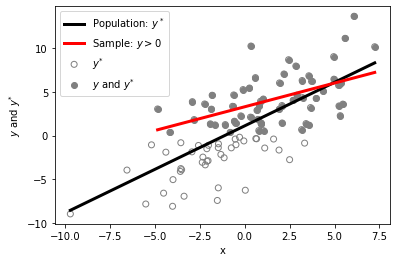

In [6]:
# （１）母集団データの散布図
plt.scatter(x, y, facecolors='none', edgecolors='gray',label=r'$y^{*}$')

# （２）切断データの散布図
plt.scatter(x, y_trunc, facecolors='gray', label=r'$y$ and $y^{*}$')

# 母集団OLS
plt.plot(x, b0_full+b1_full*x, 'k', linewidth=3, label='Population: $y^*$')

# 切断回帰
plt.plot(x_trunc, b0_trunc+b1_trunc*x_trunc, 'r', lw=3,label=r'Sample: $y> 0$')

plt.xlabel('x')
plt.ylabel(r'$y$ and $y^{*}$')
plt.legend()
pass

In [7]:
htv = wooldridge.data('HTV')
wooldridge.data('HTV',description=True)

name of dataset: htv
no of variables: 23
no of observations: 1230

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| wage     | hourly wage, 1991               |
| abil     | abil. measure, not standardized |
| educ     | highest grade completed by 1991 |
| ne       | =1 if in northeast, 1991        |
| nc       | =1 if in nrthcntrl, 1991        |
| west     | =1 if in west, 1991             |
| south    | =1 if in south, 1991            |
| exper    | potential experience            |
| motheduc | highest grade, mother           |
| fatheduc | highest grade, father           |
| brkhme14 | =1 if broken home, age 14       |
| sibs     | number of siblings              |
| urban    | =1 if in urban area, 1991       |
| ne18     | =1 if in NE, age 18             |
| nc18     | =1 if in NC, age 18             |
| south18  | =1 if in south, age 18          |
| west18   | =1 if in west, age 18      

In [8]:
formula_trunc = 'lwage ~ 1 + educ + abil + exper + nc + west + south + urban'

res_ols = ols(formula_trunc, data=htv).fit()

print(res_ols.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3987      0.185      2.158      0.031       0.036       0.761
educ           0.1037      0.010     10.704      0.000       0.085       0.123
abil           0.0558      0.008      6.565      0.000       0.039       0.072
exper          0.0448      0.007      6.619      0.000       0.032       0.058
nc            -0.1397      0.041     -3.440      0.001      -0.219      -0.060
west          -0.1282      0.049     -2.638      0.008      -0.224      -0.033
south         -0.1227      0.045     -2.742      0.006      -0.210      -0.035
urban          0.2268      0.041      5.589      0.000       0.147       0.306


In [9]:
htv_20 = htv.query('wage < 20')  # データの抽出

print(f'切断前の標本数：{len(htv)}')
print(f'切断前の標本数：{len(htv_20)}')
print(f'削除された標本数：{len(htv)-len(htv_20)}')

切断前の標本数：1230
切断前の標本数：1066
削除された標本数：164


In [10]:
res_ols_20 = ols(formula_trunc,data=htv_20).fit()

print(res_ols_20.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1795      0.174      6.795      0.000       0.839       1.520
educ           0.0579      0.009      6.258      0.000       0.040       0.076
abil           0.0548      0.008      7.168      0.000       0.040       0.070
exper          0.0218      0.006      3.467      0.001       0.009       0.034
nc            -0.1373      0.038     -3.644      0.000      -0.211      -0.063
west          -0.1415      0.045     -3.120      0.002      -0.230      -0.053
south         -0.1176      0.042     -2.833      0.005      -0.199      -0.036
urban          0.1653      0.037      4.525      0.000       0.094       0.237


In [11]:
res_trunc = Truncreg.from_formula(formula_trunc,right=np.log(20),data=htv_20).fit()

print(res_trunc.summary().tables[1])

NameError: name 'Truncreg' is not defined

In [12]:

see(res_trunc)

NameError: name 'res_trunc' is not defined

In [13]:
res_trunc.llf

NameError: name 'res_trunc' is not defined

In [14]:
res_trunc.prsquared

NameError: name 'res_trunc' is not defined

In [15]:
print(res_trunc.result_null.summary())

NameError: name 'res_trunc' is not defined

In [16]:
slopes_all = res_trunc.model.exog_names[1:-1]

NameError: name 'res_trunc' is not defined

In [17]:
# Wald検定
res_trunc.wald_test(slopes_all).summary()

NameError: name 'res_trunc' is not defined

In [18]:
res_trunc.wald_test_all_slopes

NameError: name 'res_trunc' is not defined

In [19]:
res_trunc.wald_test('educ+abil=exper').summary()

NameError: name 'res_trunc' is not defined

In [20]:
y_hat = res_trunc.fittedvalues

print(f'最小値：{y_hat.min()}\n平均：{y_hat.mean()}\n最大値：{y_hat.max()}')

NameError: name 'res_trunc' is not defined

In [21]:
u_hat = res_trunc.resid
plt.scatter(y_hat,u_hat)
plt.xlabel('y_hat')
plt.ylabel('u_hat')
pass

NameError: name 'res_trunc' is not defined

In [22]:
from scipy.stats import truncnorm
plt.scatter(htv_20['lwage'],y_hat)
plt.ylim(0,10)
plt.xlim(0,4)

X = res_trunc.fittedvalues
s = res_trunc.params[-1]
right = (np.log(20) - X)/np.exp(s)
imr = truncnorm.logpdf(-X/np.exp(s),a=-np.inf,b=right)
yexp = X-np.exp(s)*imr
plt.plot(htv_20['lwage'],yexp,'or')
# norm.cdf(X, loc=l, scale=s)

NameError: name 'y_hat' is not defined

In [23]:
# 通常の標準偏差
tr0 = res_trunc.bse

# 不均一分散頑健標準編
tr1 = Truncreg.from_formula(formula_trunc,right=np.log(20),
                            data=htv_20).fit(cov_type='HC1',disp=False).bse

# 不均一分散頑健標準編を使った場合の標準偏差の変化率（％）
(100*(tr1-tr0)/tr0)[:-1]   # 最後は Log(Sigma) なので省く

NameError: name 'res_trunc' is not defined

In [24]:
# データの大きさ 
n = 100

# y*を決定するx
x = np.sort(norm.rvs(0,3,size=n))  # ランダム変数を生成し昇順に並べる

# y*を生成
y_star = x + norm.rvs(0,3,size=n)

# yを生成
y = y_star.copy()  #  copy()はコピーを作るメソッド
y[y_star < 0] = 0  # y_star<0の場合，０を代入する

# DataFrame
df = pd.DataFrame({'Y':y, 'Y_star':y_star, 'X':x})

In [25]:
formula_star = 'Y_star ~ X'

result_star= ols(formula_star, data=df).fit()

b0_star,b1_star = result_star.params

print(result_star.params)

Intercept   -0.508306
X            0.991492
dtype: float64


In [26]:
formula_sample = 'Y ~ X'

result_corner = ols(formula_sample, data=df).fit()

b0_corner, b1_corner = result_corner.params

print(result_corner.params)

Intercept    1.488339
X            0.497411
dtype: float64


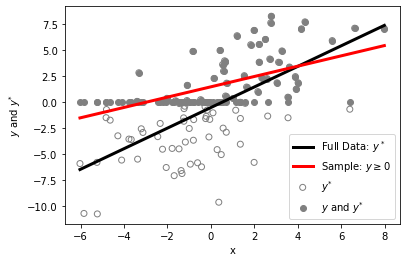

In [27]:
# y_starの散布図
plt.scatter(x, y_star, facecolors='none', edgecolors='gray',label=r'$y^{*}$')

# yの散布図
plt.scatter(x, y, facecolors='gray', label=r'$y$ and $y^{*}$')

# 母集団OLS
plt.plot(x, b0_star+b1_star*x, 'k', linewidth=3, label='Full Data: $y^*$')

# y>=0のOLS
plt.plot(x, b0_corner+b1_corner*x, 'r', lw=3,label=r'Sample: $y\geq 0$')

plt.xlabel('x')
plt.ylabel(r'$y$ and $y^{*}$')
plt.legend()
pass

In [28]:
mroz = wooldridge.data('mroz')

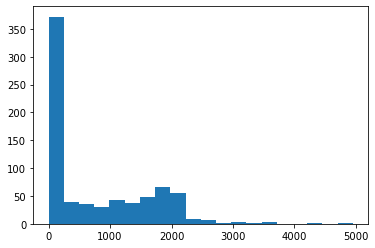

In [29]:
plt.hist(mroz['hours'],bins=20)
pass

In [30]:
left = 0

In [31]:
cond = (mroz['hours'] == left)  #  フィルターの作成

censor = np.zeros((len(mroz)))  # 0のarrayの作成

censor[cond] = -1  #  条件に合わせて-1を代入

pd.Series(censor).value_counts()  # Serieに変換し，内訳の確認

 0.0    428
-1.0    325
dtype: int64

In [32]:
censor = mroz['hours'].apply(lambda x: -1 if x==left else 0)

In [33]:
formula = 'hours ~ 1 + nwifeinc + educ + exper + expersq + age + kidslt6 + kidsge6'

res_tobit = Tobit.from_formula(formula,cens=censor,left=0,data=mroz).fit()

print(res_tobit.summary())

NameError: name 'Tobit' is not defined

In [34]:
see(res_tobit)

NameError: name 'res_tobit' is not defined

In [35]:
res_tobit.wald_test('exper=expersq=0, kidslt6=kidsge6').summary()

NameError: name 'res_tobit' is not defined

In [36]:
y_star_hat = res_tobit.fittedvalues

u_hat = res_tobit.resid

plt.scatter(y_star_hat,u_hat)
pass

NameError: name 'res_tobit' is not defined

In [37]:
# 通常の標準偏差
to0 = res_tobit.bse

# 不均一分散標準偏差
res_tobit_HC1 = Tobit.from_formula(formula,cens=censor,left=left,
                         data=mroz).fit(cov_type='HC1',disp=False)
to1 = res_tobit_HC1.bse

# 不均一分算標準偏差を使った場合の標準偏差の変化（％）
(100*(to1-to0)/to0)[:-1]     # Log(Sigma)を省く

NameError: name 'res_tobit' is not defined

In [38]:
mroz.query('inlf == 1')['lwage'].isna().sum()

0

In [39]:
( ~mroz.query('inlf == 0')['lwage'].isnull() ).sum()

0

In [40]:
# ステップ２：　mros

# ステップ３：第２段階の被説明変数
endog = mroz.loc[:,'lwage']

# ステップ４：第２段階の説明変数
exog = mroz.loc[:,['educ', 'exper', 'expersq']]
exog['Intercept'] = 1.0


# ステップ５：第１段階の説明変数
exog_select = mroz.loc[:,['educ', 'exper', 'expersq','nwifeinc', 'age', 'kidslt6', 'kidsge6', ]]
exog_select['Intercept'] = 1.0

In [41]:
res_heckit = Heckit(endog, exog, exog_select).fit(cov_type_2='HC1')

print(res_heckit.summary())

NameError: name 'Heckit' is not defined

In [42]:
see(res_heckit)

NameError: name 'res_heckit' is not defined

In [43]:
see(res_heckit.select_res)

NameError: name 'res_heckit' is not defined

In [44]:
print(res_heckit.select_res.summary().tables[0])

NameError: name 'res_heckit' is not defined

In [45]:
formula = 'lwage ~ educ + exper + expersq'

res = ols(formula, data=mroz).fit(cov_type='HC1')

print(res.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5220      0.202     -2.589      0.010      -0.917      -0.127
educ           0.1075      0.013      8.131      0.000       0.082       0.133
exper          0.0416      0.015      2.722      0.006       0.012       0.072
expersq       -0.0008      0.000     -1.931      0.053      -0.002    1.21e-05


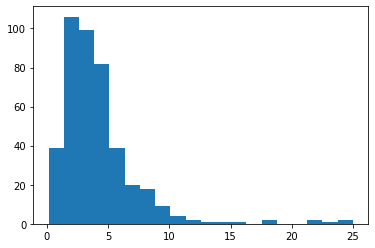

In [46]:
plt.hist(mroz['wage'].dropna(),bins=20)
pass

In [47]:
thresh = np.log(mroz['wage'].min()*0.5)  # 左切断の下限

formula = 'lwage ~ 1 + educ + exper + expersq'

res_trunc = Truncreg.from_formula(formula, left=thresh,
                                  data=mroz.dropna(subset=['lwage'])).fit()

print(res.summary().tables[1])

NameError: name 'Truncreg' is not defined

In [48]:
het_test_probit(res_heckit.select_res)

NameError: name 'het_test_probit' is not defined